
<h1 id="Image-Pyramids">CV LAB 04: Image Pyramids<a class="anchor-link" href="#Image-Pyramids"></a></h1>

<font color = "orange">*Sudarsanan A K*<br>
*SC21M063*</font>


<h2 id="Lesson-Plan">Lesson Plan<a class="anchor-link" href="#Lesson-Plan"></a></h2><ul>
<li>Gaussian image pyramids</li>
<li>Laplacian image pyramids</li>
<li>Laplacian blending</li>
</ul>



<h2 id="Uses">Uses<a class="anchor-link" href="#Uses"></a></h2><p>Often used to achieve scale-invariant processing in the following contexts:</p>
<ul>
<li>template matching;</li>
<li>image registration;</li>
<li>image enhancement;</li>
<li>interest point detection; and</li>
<li>object detection.</li>
</ul>



<h2 id="Gaussian-Image-Pyramid">Gaussian Image Pyramid<a class="anchor-link" href="#Gaussian-Image-Pyramid">¶</a></h2><p>The basic idea for constructing Gaussian image pyramid is as follows:</p>
<ol>
<li>Gaussian blur the image</li>
<li>Reduce image dimensions by half by discarding every other row and and every other column</li>
<li>Repeat this process until desired numbers levels are achieved or the image is reduced to size $1 \times 1$.</li>
</ol>
<figure style="margin-left:auto; margin-right: auto; text-align: center; display: block; max-width: 700px;">
<img alt="Drawing" src="https://drive.google.com/uc?id=1N-CWmS9QgRjhSNWnm_jC2gKLkFXVywNy" style="width: 300px;"/>
<figcaption style="text-align: center; margin-bottom: 10px; font-style: italic;">Courtesy D. Forsyth</figcaption>
</figure>


In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt


<h2 id="Exercise-04-01">Exercise 04-01<a class="anchor-link" href="#Exercise-04-01"></a></h2><ul>
<li>Load image '04-data/apple.jpg'</li>
<li>Blur each channel with a 5-by-5 Gaussian kernel</li>
</ul>


Shape of I = (512, 512, 3)
Shape of I2 = (256, 256, 3)


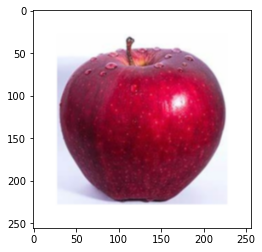

In [2]:
I = cv.imread('data/apple.jpeg')
I = cv.cvtColor(I, cv.COLOR_BGR2RGB)
I = cv.resize(I, (512, 512))

print('Shape of I = {}'.format(I.shape))

I[:,:,0] = cv.GaussianBlur(I[:,:,0], (5,5), 2, 2)
I[:,:,1] = cv.GaussianBlur(I[:,:,1], (5,5), 2, 2)
I[:,:,2] = cv.GaussianBlur(I[:,:,2], (5,5), 2, 2)

I2 = I[::2,::2,:]
print('Shape of I2 = {}'.format(I2.shape))

plt.imshow(I2)
plt.show()

<li>Construct the next level of Gaussian pyramid by discarding every other row or column</li>
<h2 id="Implementation-(Gaussian-Image-Pyramid)">Implementation (Gaussian Image Pyramid)<a class="anchor-link" href="#Implementation-(Gaussian-Image-Pyramid)">¶</a></h2>


In [3]:
#def gen_gaussian_pyramid(I, levels=6):
def gen_gaussian_pyramid(I, levels=6):
    G = I.copy()
    gpI = [G]
    for i in range(levels):
        G = cv.pyrDown(G)
        gpI.append(G)
    return gpI

In [4]:
#def gen_pyramid(I, levels=6):
def gen_pyramid(I, levels=6):
    G = I.copy()
    pI = [G]
    for i in range(levels):
        G = G[::2,::2,:]
        pI.append(G)
    return pI

In [5]:

foo = gen_gaussian_pyramid(I, levels=9)
boo = gen_pyramid(I, levels=9)

for i in foo:
    print(i.shape)

for i in boo:
    print(i.shape)



(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)
(4, 4, 3)
(2, 2, 3)
(1, 1, 3)
(512, 512, 3)
(256, 256, 3)
(128, 128, 3)
(64, 64, 3)
(32, 32, 3)
(16, 16, 3)
(8, 8, 3)
(4, 4, 3)
(2, 2, 3)
(1, 1, 3)


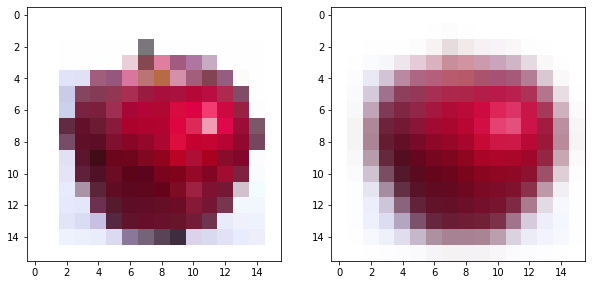

In [6]:

plt.figure(figsize=(10,5))
plt.subplot(121)
plt.imshow(boo[5])        
plt.subplot(122)
plt.imshow(foo[5])
plt.show()

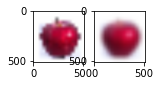

In [7]:

plt.figure(figsize=(2,1))
plt.subplot(121)
plt.imshow(cv.resize(boo[5], (512,512))) 
plt.subplot(122)
plt.imshow(cv.resize(foo[5], (512,512))) 
plt.show()



<p>OpenCV <code>pyrDown</code> method performs steps 1 and 2 above.  It uses the following kernel to blur the image (in step 1).</p>
$$
\frac{1}{256}
\left[
\begin{array}{ccccc}
1 \quad;\quad 4 \quad;\quad 6 \quad;\quad 4 \quad;\quad 1 \\
4 \quad;\quad 16 \quad;\quad 24 \quad;\quad 16 \quad;\quad 4 \\
6 \quad;\quad 24 \quad;\quad 36 \quad;\quad 24 \quad;\quad 6 \\
4 \quad;\quad 16 \quad;\quad 24 \quad;\quad 16 \quad;\quad 4 \\
1 \quad;\quad 4 \quad;\quad 6 \quad;\quad 4 \quad;\quad 1
\end{array}
\right]
$$


In [8]:

A = cv.imread('data/apple.jpeg')
B = cv.imread('data/orange.jpeg')
A = cv.cvtColor(A, cv.COLOR_BGR2RGB)
B = cv.cvtColor(B, cv.COLOR_BGR2RGB)



In [9]:

gpA = gen_gaussian_pyramid(A)
gpB = gen_gaussian_pyramid(B)



In [10]:

gp = gpB
num_levels = len(gp)
for i in range(num_levels):
    rows = gp[i].shape[0]
    cols = gp[i].shape[1]
    print('level={}: size={}x{}'.format(i, rows, cols))



level=0: size=512x512
level=1: size=256x256
level=2: size=128x128
level=3: size=64x64
level=4: size=32x32
level=5: size=16x16
level=6: size=8x8


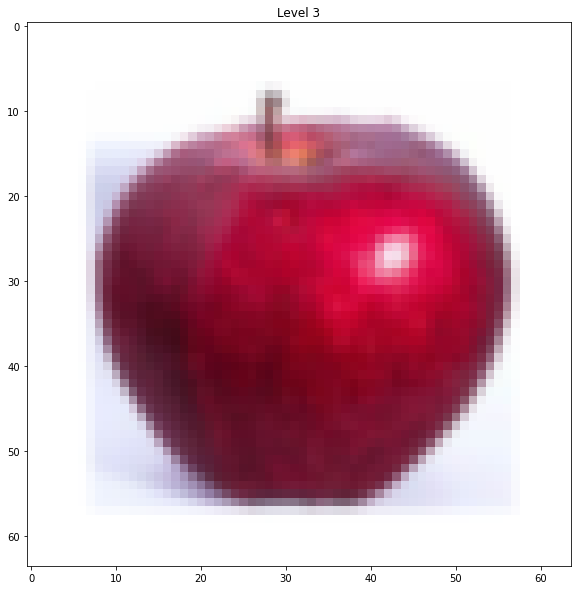

In [11]:

gp = gpA
level = 3
plt.figure(figsize=(10,10))
plt.title('Level {}'.format(level))
plt.imshow(gp[level])
plt.show()



<h2 id="Laplacian-Image-Pyramid">Laplacian Image Pyramid<a class="anchor-link" href="#Laplacian-Image-Pyramid"></a></h2><p>Proposed by Burt and Adelson is a bandpass image decomposition derived from the Gaussian pyramid.  Each level encodes information at a particular spatial frequency.  The basic steps for constructing Laplacian pyramids are:</p>
<ol>
<li><p>Convolve the original image $g_0$ with a lowpass filter $w$ (e.g., the Gaussian filter) and subsample it by two to create a reduced lowpass version of the image $g_1$.  Recall that this is what function <code>pyrDown</code> does.</p>
</li>
<li><p>Upsample this image (i.e., $g_1$) by inserting zeros in between each row and column and interpolating the missing values by convolving it with the same filter $w$ to create the expanded lowpass image $g'_1$ which is subtracted pixel by pixel from the original to give the detail image $L_0$.  Specifically $L_0 = g_0 - g'_1$.</p>
</li>
<li>Repeat steps 1 and 2.</li>
</ol>
<figure style="margin-left:auto; margin-right: auto; text-align: center; display: block; max-width: 700px;">
<img alt="Drawing" src="https://drive.google.com/uc?id=18amlXCcyRfzKq4lWGXUKa1biTaHoTrOV" style="width: 300px;"/>
<figcaption style="text-align: center; margin-bottom: 10px; font-style: italic;">Courtesy D. Forsyth</figcaption>
</figure><p>We define Laplacian operator as follows:</p>
$$
\nabla^2 f = \frac{\partial^2 f}{\partial x^2} + \frac{\partial^2 f}{\partial y^2}
$$<p>In addition we can approximate the Laplacian of a Gaussian as follows:</p>
<figure style="margin-left:auto; margin-right: auto; text-align: center; display: block; max-width: 700px;">
<img alt="Drawing" src="https://drive.google.com/uc?id=12GSmu9a5fwbS7A-N7JE3k0yFZFrk5EFh" style="width: 300px;"/>
<figcaption style="text-align: center; margin-bottom: 10px; font-style: italic;">Source: Lazebnik</figcaption>
</figure><p>We use this property when constructing Laplacian image pyramids above.</p>



<h3 id="Reconstructing-the-original-image">Reconstructing the original image<a class="anchor-link" href="#Reconstructing-the-original-image">¶</a></h3><p>It is possible to reconstruct the original image $g_0$ from its Laplacian image pyramd consisting of $N+1$ detail images $L_i$, where $i \in [0,N]$ and the low pass image $g_N$.</p>
<ol>
<li>$g_N$ is upsampled by inserting zeros between the sample values and interpolating the missing values by convolving it with the filter $w$ to obtain the image $g'_N$.</li>
<li>The image $g'_N$ is added to the lowest level detail image $L_N$ to obtain the approximation image at the next upper level.</li>
<li>Steps 1 and 2 are repeated on the detail images $L_i$ to obtain the original image.</li>
</ol>



<h3 id="Uses">Uses<a class="anchor-link" href="#Uses">¶</a></h3><p>Laplacian image pyramids are often used for compression.  Instead of encoding $g_0$, we encode $L_i$, which are decorrelated and can be represented using far fewer bits.</p>



<h2 id="Implementation-(Laplacian-Image-Pyramid)">Implementation (Laplacian Image Pyramid)<a class="anchor-link" href="#Implementation-(Laplacian-Image-Pyramid)">¶</a></h2>


In [12]:
#def gen_laplacian_pyramid(gpI):
def gen_laplacian_pyramid(gpI):
    """gpI is a Gaussian pyramid generated using gen_gaussian_pyramid method found in py file of the same name."""
    num_levels = len(gpI)-2
    lpI = [gpI[5]]
    for i in range(5,0,-1):
        size = (gpA[i-1].shape[1], gpA[i-1].shape[0])
        GE = cv.pyrUp(gpA[i], dstsize = size)
        L = cv.subtract(gpA[i-1],GE)
        lpI.append(L)
    return lpI

In [13]:
lpA = gen_laplacian_pyramid(gpA)
lpB = gen_laplacian_pyramid(gpB)

In [14]:
lp = lpA
num_levels = len(lp)
for i in range(num_levels):
    rows = lp[i].shape[0]
    cols = lp[i].shape[1]
    print('level={}: size={}x{}'.format(i, cols, rows))



level=0: size=16x16
level=1: size=32x32
level=2: size=64x64
level=3: size=128x128
level=4: size=256x256
level=5: size=512x512


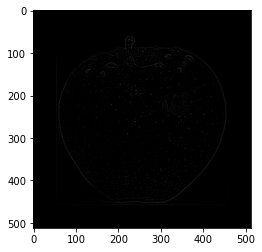

In [15]:
plt.imshow(lp[5])
plt.show()


<h2 id="Laplacian-Blending-Example">Laplacian Blending Example<a class="anchor-link" href="#Laplacian-Blending-Example">¶</a></h2>


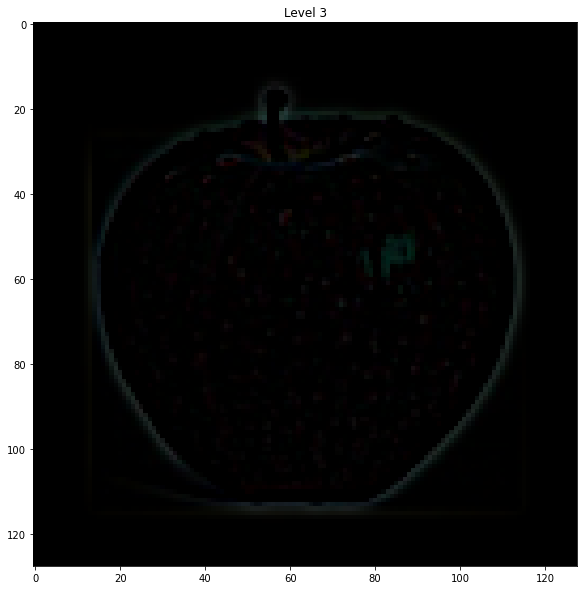

In [16]:
lp = lpA
level = 3
plt.figure(figsize=(10,10))
plt.title('Level {}'.format(level))
plt.imshow(lp[level])
plt.show()

In [17]:
LS = []
for la, lb in zip(lpA, lpB):
    rows, cols, dpt = la.shape
    ls = np.hstack((la[:,0:cols//2,:], lb[:,cols//2:,:]))
    LS.append(ls)

In [18]:
ls_ = LS[0]
for i in range(1,6):
    ls_ = cv.pyrUp(ls_)
    ls_ = cv.add(ls_, LS[i])

In [19]:
real = np.hstack((A[:,:cols//2],B[:,cols//2:]))

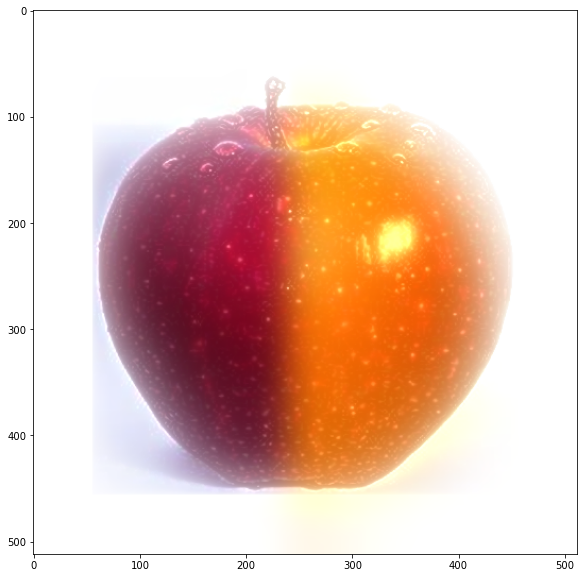

In [21]:
plt.figure(figsize=(10,10))
plt.imshow(ls_)
plt.show()

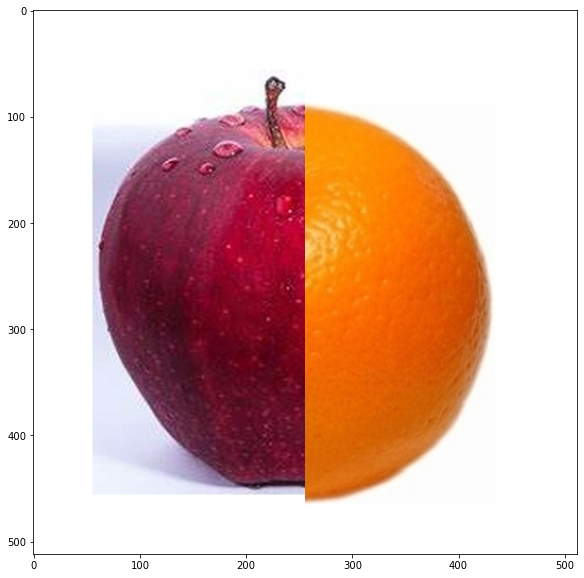

In [22]:
plt.figure(figsize=(10,10))
plt.imshow(real)
plt.show()


<h2 id="Conclusions-and-Summary">Conclusions and Summary<a class="anchor-link" href="#Conclusions-and-Summary"></a></h2><ul>
<li>Gaussian pyramid<ul>
<li>Coarse-to-fine search</li>
<li>Multi-scale image analysis (<em>hold this thought</em>)</li>
</ul>
</li>
<li>Laplacian pyramid<ul>
<li>More compact image representation</li>
<li>Can be used for image compositing (computation photography)</li>
</ul>
</li>
<li>Downsampling<ul>
<li><em>Nyquist limit</em>:  The Nyquist limit gives us a theoretical limit to what rate we have to sample a signal that contains data at a certain maximum frequency. Once we sample below that limit, not only can we not accurately sample the signal, but the data we get out has corrupting artifacts. These artifacts are "aliases".</li>
<li>Need to sufficiently low-pass before downsampling</li>
</ul>
</li>
</ul>



<h3 id="Various-image-representations">Various image representations<a class="anchor-link" href="#Various-image-representations"></a></h3><ul>
<li>Pixels: great for spatial processing, poor access to frequency</li>
<li>Fourier transform: great for frequency analysis, poor spatial info</li>
<li>Pyramids: trade-off between spatial and frequency information</li>
</ul>
